In [37]:
import yfinance as yf
import matplotlib.pyplot as plt
import altair as alt
import pandas as pd
from datetime import datetime, timedelta



import requests, json, os, warnings, re
import pandas as pd
import datetime


### Long-interval

In [39]:
#define the ticker symbol
tickerSymbol = 'TSLA'

#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

#get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start='2020-01-1', end='2020-09-12')

#see your data
tickerDf.tail()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-09-04,402.81,428.00,372.02,418.32,110321900,0,0.0
2020-09-08,356.00,368.74,329.88,330.21,115465700,0,0.0
2020-09-09,356.60,369.00,341.51,366.28,79465800,0,0.0
2020-09-10,386.21,398.99,360.56,371.34,84186800,0,0.0
2020-09-11,386.21,382.50,361.30,370.71,34016428,0,0.0


In [2]:
tickerData.calendar

,0,1
Earnings Date,2020-10-21 00:00:00,2020-10-26 00:00:00
Earnings Average,0.53,0.53
Earnings Low,0.22,0.22
Earnings High,0.91,0.91
Revenue Average,8066680000,8066680000
Revenue Low,6681000000,6681000000
Revenue High,9005300000,9005300000


In [3]:
tickerData.recommendations

,Firm,To Grade,From Grade,Action
Date,,,,
2012-02-16 07:42:00,JP Morgan,Overweight,,main
2012-02-16 13:53:00,Wunderlich,Hold,,down
2012-02-17 06:17:00,Oxen Group,Buy,,init
2012-03-26 07:31:00,Wunderlich,Buy,,up
2012-05-22 05:57:00,Maxim Group,Buy,,init
...,...,...,...,...
2020-08-31 16:21:38,Argus Research,Buy,,main
2020-09-01 15:57:05,RBC Capital,Underperform,,main
2020-09-02 12:47:13,Bank of America,Neutral,,reit


In [4]:
priceData = tickerDf.Open


In [5]:
priceData = priceData.asfreq(pd.infer_freq(priceData.index))


In [6]:
priceData 

Date
2020-01-02     84.90
2020-01-03     88.10
2020-01-04       NaN
2020-01-05       NaN
2020-01-06     88.09
               ...  
2020-09-07       NaN
2020-09-08    356.00
2020-09-09    356.60
2020-09-10    386.21
2020-09-11    386.21
Freq: D, Name: Open, Length: 254, dtype: float64

Text(0.5, 1.0, 'TSLA Price Data')

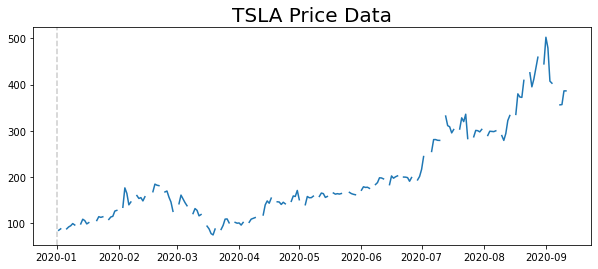

In [7]:
plt.figure(figsize=(10,4))
plt.plot(priceData)
for year in range(priceData.index[0].year, priceData.index[-1].year+1):
    plt.axvline(datetime(year,1,1), color='k', linestyle='--', alpha=0.2)
plt.title("%s Price Data"%tickerSymbol, fontsize=20)

### Short-interval

In [8]:
from datetime import datetime
from alpha_realtime_stock import AlphaRealtimeStock
import time
import timeit
import requests
from bs4 import BeautifulSoup
import re

def get_crumbs():
    """
    get crumb  from yahoo finance
    returns crumb
    """
    url = 'https://finance.yahoo.com/quote'
    header = {'Connection': 'keep-alive',
              'Expires': '-1',
              'Upgrade-Insecure-Requests': '1',
              'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) \
               AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.138 Safari/537.36'
              }

    website = requests.get(url, headers=header)
    soup = BeautifulSoup(website.text, 'lxml')
    crumb = re.findall('"CrumbStore":{"crumb":"(.+?)"}', str(soup))
    return crumb[0]

crumb = get_crumbs()
ticker_list = ['TSLA']
stock_collection = {}
for ticker in ticker_list:
    stock = AlphaRealtimeStock(ticker, crumb)
    stock_collection[ticker] = stock
# while True:
#     print(datetime.now().strftime("%H:%M:%S"))
    for ticker in ticker_list:
        stock = stock_collection[ticker]
        stock.fetch_webdata()
#         df = stock.get_Stoch_RSI_Indicator()
#         print(df.tail())
#     end = timeit.default_timer()
#     time.sleep(5)

In [12]:
stock.fetch_webdata().tail()

,Datetime,Open,High,Low,Close,Volume
564,2020-09-11 09:50:00,374.019989,374.429993,372.200012,372.468994,446751
565,2020-09-11 09:55:00,372.575012,375.000000,371.130005,371.350006,670897
566,2020-09-11 10:00:00,371.519897,372.730011,369.570007,372.394989,603616
567,2020-09-11 10:05:00,372.170013,372.679993,371.160095,372.153015,170576
568,2020-09-11 10:07:51,372.790009,372.790009,372.790009,372.790009,0


#### Using API

In [21]:
params={}

params['function']='TIME_SERIES_INTRADAY'
params['symbol']='TSLA'
params['interval']='5min'
params

{'function': 'TIME_SERIES_INTRADAY', 'symbol': 'TSLA', 'interval': '5min'}

In [30]:
def data_request(params):
    url = "https://www.alphavantage.co/query"
    params['apikey'] = os.environ['ALPHA_PAT']

    return requests.get(url, params)

In [80]:
def data_request(params):
    url = "https://www.alphavantage.co/query"
    params['apikey'] = os.environ['ALPHA_PAT']

    return requests.get(url, params)
                        
def Get_TimeSeries(stock, period):
    """
    A wrapper function to obtain the the time series of a the desired stock from the Alpha Vantage API.
    
    Parameters:
    -----------
    stock: the desired stock symbol (e.g., "GOOG", "AMD", "FB", "INTC").
    period: "daily", "weekly", "monthly"
    
    Returns:
    --------
    A pandas dataframe with the columns `open`, `high`, `low`, `close`, and `volume`.
    """
    
    # Process here the parameter `period`
    # which affects the function parameter in the API
    
    # TODO

    params={}
    if period=='daily':
        params['function'] = 'TIME_SERIES_DAILY'
        series='Time Series (Daily)'
    elif period=='weekly':
         params['function'] = 'TIME_SERIES_WEEKLY'
         series='Weekly Time Series'
    elif period=='monthly':
         params['function'] = 'TIME_SERIES_MONTHLY'
         series='Monthly Time Series'
    
 
    
    # Now let's create a dictionary to hold the parameters of 
    # our request.
    
    # TODO
    params['symbol'] = stock

    # Requesting the data
    
    # TODO
    r=data_request(params) 
    
    # Check if the request was successful, if not raise an
    # exception
    
    # TODO
        
    
    
    # Create the pandas dataframe (see: pd.read_json() )
    
    # TODO
    json = r.json()
   
    data = pd.DataFrame.from_dict(json[series], orient="index")
    data=data.reset_index()
    data=data.rename(columns={"index": "date", "1. open": "open","2. high": "high","3. low": "low","4. close":"close","5. volume":"volume"})

    data.stock= json['Meta Data']['2. Symbol']
    


    
    return data

In [81]:
stock_data=Get_TimeSeries('TSLA', 'daily')
stock_data

,date,open,high,low,close,volume
0,2020-09-10,386.2100,398.9900,360.5600,371.3400,84930608
1,2020-09-09,356.6000,369.0000,341.5100,366.2800,79465769
2,2020-09-08,356.0000,368.7400,329.8800,330.2100,115465691
3,2020-09-04,402.8100,428.0000,372.0201,418.3200,110321885
4,2020-09-03,407.2300,431.8000,402.0000,407.0000,87596086
...,...,...,...,...,...,...
95,2020-04-27,737.6100,799.4900,735.0000,798.7500,20681400
96,2020-04-24,710.8100,730.7300,698.1800,725.1500,13237600
97,2020-04-23,727.6000,734.0000,703.1300,705.6300,13236700
98,2020-04-22,703.9800,734.0000,688.7100,732.1100,14224800


In [82]:
stock_data.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume'], dtype='object')

In [83]:
def Plot_TimeSeries(data):
    
    title_price='Stock price of '+data.stock
    title_volume= 'Volume of '+data.stock
    stock_color = alt.condition("datum.open <= datum.close",
                                     alt.value("#06982d"),
                                     alt.value("#ae1325"))
    
    base = alt.Chart(data,title=title_price).encode(
        alt.X('date:T',
              axis=alt.Axis(
                  title='Date'
              )
        ),
        color=stock_color
    )

    rule = base.mark_rule().encode(
        alt.Y(
            'low:Q',
            title='Price',
            scale=alt.Scale(zero=False),
        ),
        alt.Y2('high:Q')
    )

    bar = base.mark_bar().encode(
        alt.Y('open:Q'),
        alt.Y2('close:Q')
    )
    price_plot=rule + bar
    volume_plot=alt.Chart(data,title=title_volume).mark_bar().encode(
        alt.X('date:T',
              axis=alt.Axis(
                  title='Date'
              )),
        alt.Y('volume:Q')
   ).properties(height=100)
    
    return(price_plot & volume_plot)

In [84]:
Plot_TimeSeries(stock_data)

alt.VConcatChart(...)

### Modeling

In [120]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler



In [152]:
# using different model

In [245]:
df1 = yf.download('TSLA','2019-01-29','2020-09-11',interval='1d')

[*********************100%***********************]  1 of 1 completed


In [246]:
df1

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-29,59.054001,59.712002,58.360001,59.492001,59.492001,23108500
2019-01-30,60.090000,61.799999,59.698002,61.754002,61.754002,56251500
2019-01-31,60.200001,62.312000,58.799999,61.403999,61.403999,62846000
2019-02-01,61.084000,63.220001,60.700001,62.442001,62.442001,36417000
2019-02-04,62.596001,63.060001,60.375999,62.577999,62.577999,36760500
...,...,...,...,...,...,...
2020-09-03,407.230011,431.799988,402.000000,407.000000,407.000000,87596100
2020-09-04,402.809998,428.000000,372.019989,418.320007,418.320007,110321900
2020-09-08,356.000000,368.739990,329.880005,330.209991,330.209991,115465700


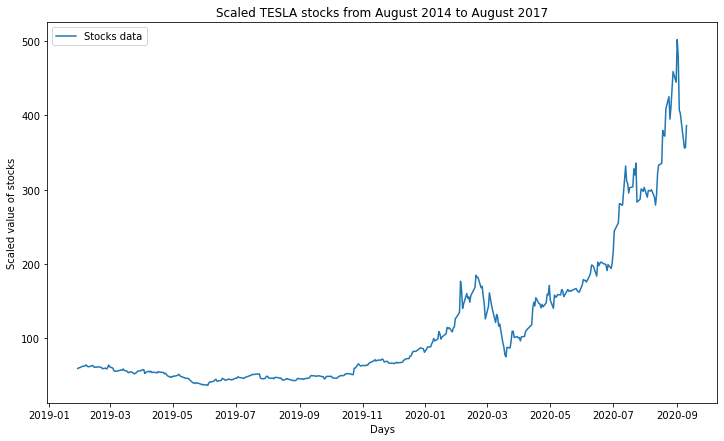

In [247]:
plt.figure(figsize=(12,7))
plt.title('Scaled TESLA stocks from August 2014 to August 2017')
plt.xlabel('Days')
plt.ylabel('Scaled value of stocks')
plt.plot(df1['Open'], label='Stocks data')
plt.legend()
plt.show()

In [248]:
df1 = df1.reset_index()

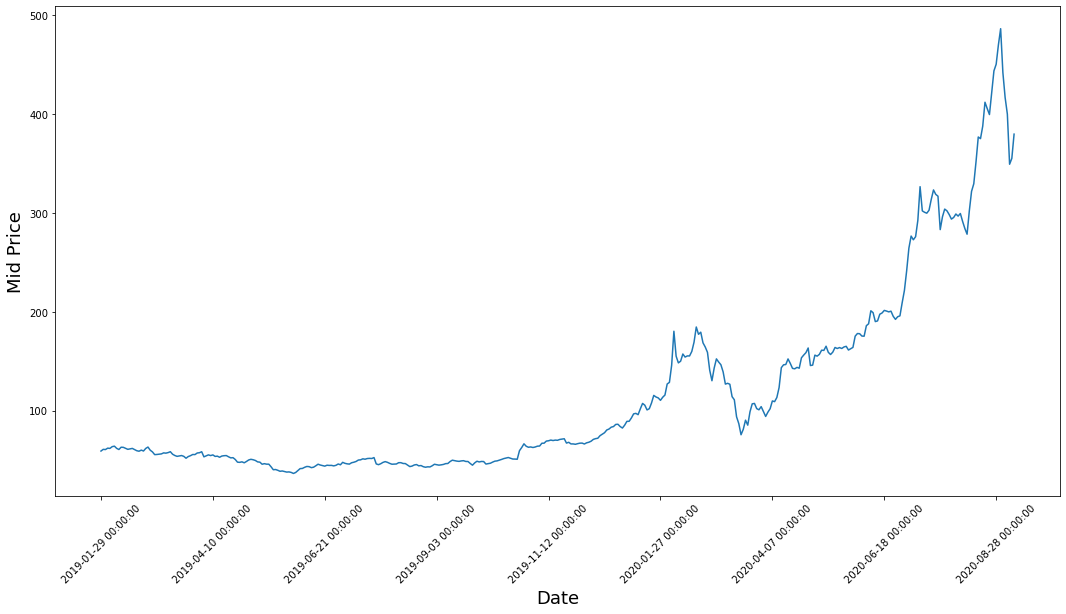

In [249]:
plt.figure(figsize = (18,9))
plt.plot(range(df1.shape[0]),(df1['Low']+df1['High'])/2.0)
plt.xticks(range(0,df1.shape[0],50),df1['Date'].loc[::50],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

In [250]:
df = df1['Open'].values
print("Total No. of days of TSLA's Stocks :",df.shape[0])

Total No. of days of TSLA's Stocks : 409


In [251]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8)-50:])
print('Training stock :',dataset_train.shape[0],'days')
print('Test stock :',dataset_test.shape[0],'days')

Training stock : 327 days
Test stock : 132 days


In [252]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train.reshape(-1, 1))

In [253]:
dataset_test = scaler.transform(dataset_test.reshape(-1, 1))


In [254]:
def create_dataset(df,n):
    '''
    Function to prepare data for the LSTM
    
    '''
    
    x = []
    y = []
  
    for i in range(n, df.shape[0]):
        x.append(df[i-n:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [255]:
x_train, y_train = create_dataset(dataset_train,50)


In [256]:
x_test, y_test = create_dataset(dataset_test,50)


In [257]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [258]:
print('Training data shape',x_train.shape)
print('Test data shape',x_test.shape)

Training data shape (277, 50, 1)
Test data shape (82, 50, 1)


In [259]:
model = Sequential()

model.add(LSTM(units=96, 
               return_sequences=True,
               input_shape=(x_train.shape[1], 1)))

model.add(Dropout(0.2))

model.add(LSTM(units=96, 
               return_sequences=True))

model.add(Dropout(0.2))

model.add(LSTM(units=96, 
               return_sequences=True))

model.add(Dropout(0.2))

model.add(LSTM(units=96))

model.add(Dropout(0.2))

model.add(Dense(units=1))

In [260]:

from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout   ## importing layers of Neural network
from keras.callbacks import ModelCheckpoint     ## imporing modelcheck pointer
from keras.losses import MSE                  ## importing error function
from keras.optimizers import Adam              ## importing optimizer
from keras.activations import relu

In [261]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 50, 96)            37632     
_________________________________________________________________
dropout_8 (Dropout)          (None, 50, 96)            0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 50, 96)            74112     
_________________________________________________________________
dropout_9 (Dropout)          (None, 50, 96)            0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 50, 96)            74112     
_________________________________________________________________
dropout_10 (Dropout)         (None, 50, 96)            0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 96)               

In [262]:
model.compile(loss=MSE, optimizer=Adam())


In [263]:
checkpointer = ModelCheckpoint(filepath='tesla.stock_prediction.hdf5',save_best_only=True,verbose=1)

callbacks = [checkpointer]

In [264]:
history = model.fit(x_train,y_train,batch_size=32,epochs=70,verbose=1,callbacks=[checkpointer],validation_split=0.05)


Epoch 1/70
8/9 [=========================>....] - ETA: 0s - loss: 0.0524
Epoch 00001: val_loss improved from inf to 0.26631, saving model to tesla.stock_prediction.hdf5
9/9 [==============================] - 2s 196ms/step - loss: 0.0510 - val_loss: 0.2663
Epoch 2/70
8/9 [=========================>....] - ETA: 0s - loss: 0.0349
Epoch 00002: val_loss improved from 0.26631 to 0.03039, saving model to tesla.stock_prediction.hdf5
9/9 [==============================] - 1s 62ms/step - loss: 0.0359 - val_loss: 0.0304
Epoch 3/70
8/9 [=========================>....] - ETA: 0s - loss: 0.0227
Epoch 00003: val_loss did not improve from 0.03039
9/9 [==============================] - 1s 57ms/step - loss: 0.0231 - val_loss: 0.0415
Epoch 4/70
8/9 [=========================>....] - ETA: 0s - loss: 0.0184
Epoch 00004: val_loss did not improve from 0.03039
9/9 [==============================] - 1s 57ms/step - loss: 0.0182 - val_loss: 0.0363
Epoch 5/70
8/9 [=========================>....] - ETA: 0s - loss:

In [265]:
model = load_model('tesla.stock_prediction.hdf5')


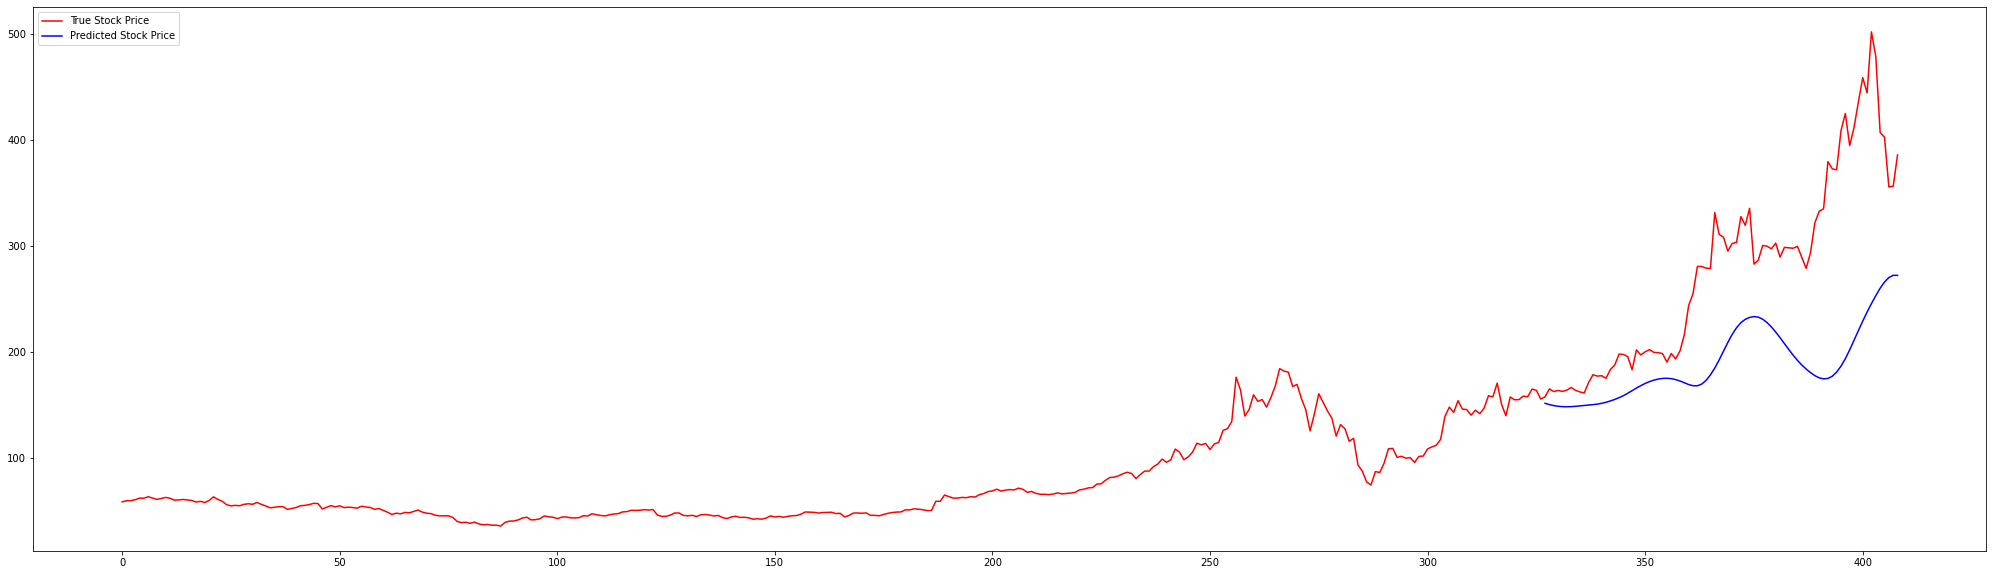

In [266]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

fig, ax = plt.subplots(figsize=(35,10))
plt.plot(df, color='red',  label="True Stock Price",)
ax.plot(range(len(y_train)+50,len(y_train)+50+len(predictions)),predictions, color='blue', label='Predicted Stock Price')
plt.legend()

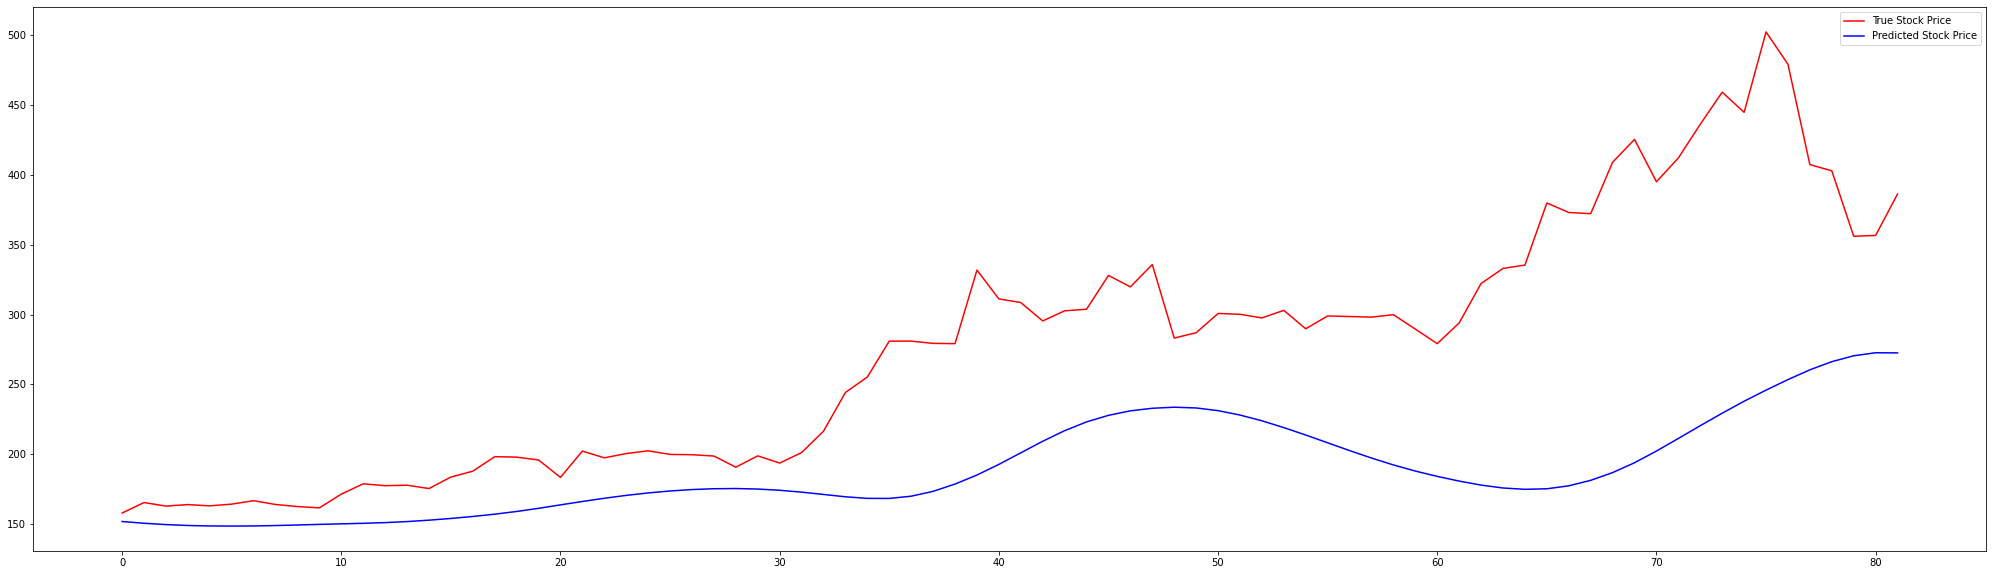

In [267]:
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))


fig, ax = plt.subplots(figsize=(35,10))
ax.plot(y_test_scaled, color='red', label='True Stock Price')
plt.plot(predictions, color='blue', label='Predicted Stock Price')
plt.legend()

In [268]:
df1.reset_index(inplace=True)
comparison = df1[['Date','Open']].iloc[len(y_train)+50:] 


In [269]:
comparison['Predictions'] = predictions
comparison


,Date,Open,Predictions
327,2020-05-15,158.070007,152.013840
328,2020-05-18,165.556000,150.752960
329,2020-05-19,163.033997,149.807983
330,2020-05-20,164.100006,149.164536
331,2020-05-21,163.199997,148.821960
...,...,...,...
404,2020-09-03,407.230011,260.481842
405,2020-09-04,402.809998,266.300568
406,2020-09-08,356.000000,270.535187
407,2020-09-09,356.600006,272.681976


In [270]:
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [271]:
mean_absolute_error(comparison['Open'],comparison['Predictions'])


86.30795548601849